# Imports and config

In [1]:
import os
import pickle
import warnings
import random
import pickle

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from cycler import cycler

import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

from feature_selector import FeatureSelector
import config as cfg
import data_processing as dp


warnings.filterwarnings('ignore')
plt.style.use('seaborn-dark-palette')

In [2]:
df_fs=pd.read_pickle("cleaned_sets/df_features.pkl")

KeyboardInterrupt: 

# Feature Selection

In [3]:
df_fs = df_fe.copy()
df_fs.head(1)

,shop_id,item_id,date_block_num,random_date,mean_item_price,std_item_price,item_cnt_month,days_with_sell,item_name,item_category_id,...,mean_city_cnt_month,mean_city_item_price,std_city_item_price,mean_category_cnt_month_lag1,mean_category_item_price_lag1,std_category_item_price_lag1,mean_city_cnt_month_lag1,mean_city_item_price_lag1,std_city_item_price_lag1,is_lowest_price
0,0,16385,0,20.01.2013,200.0,0.0,2.0,2.0,"Нэнси Дрю. Сгоревшее алиби [PC, Jewel]",30,...,0.581237,513.799861,2.299256,NaN,NaN,NaN,NaN,NaN,NaN,True


In [4]:
df_fs.columns

Index(['shop_id', 'item_id', 'date_block_num', 'random_date',
       'mean_item_price', 'std_item_price', 'item_cnt_month', 'days_with_sell',
       'item_name', 'item_category_id', 'main_category_name',
       'sub_category_name', 'city_name', 'item_cnt_next_month', 'month',
       'year', 'nb_days', 'mean_item_price_lag1', 'mean_item_price_lag2',
       'std_item_price_lag1', 'std_item_price_lag2', 'item_cnt_month_lag1',
       'item_cnt_month_lag2', 'item_cnt_month_lag12',
       'mean_category_cnt_month', 'mean_category_item_price',
       'std_category_item_price', 'mean_city_cnt_month',
       'mean_city_item_price', 'std_city_item_price',
       'mean_category_cnt_month_lag1', 'mean_category_item_price_lag1',
       'std_category_item_price_lag1', 'mean_city_cnt_month_lag1',
       'mean_city_item_price_lag1', 'std_city_item_price_lag1',
       'is_lowest_price'],
      dtype='object')

In [5]:
col_to_remove = ["random_date","item_name","item_category_id"]
df_fs = df_fs.drop(col_to_remove, axis=1)

In [6]:
col_id = ["shop_id","item_id","date_block_num"]
df_fs_predictors = df_fs.loc[:,[col for col in df_fs.columns if col not in col_id]]

![caption](images/feature_heatmap.png)

In [7]:
fs = FeatureSelector(data = df_fs_predictors, labels = "item_cnt_month")

#### Collinearity

In [8]:
fs.identify_collinear(correlation_threshold = 0.80)

8 features with a correlation magnitude greater than 0.80.



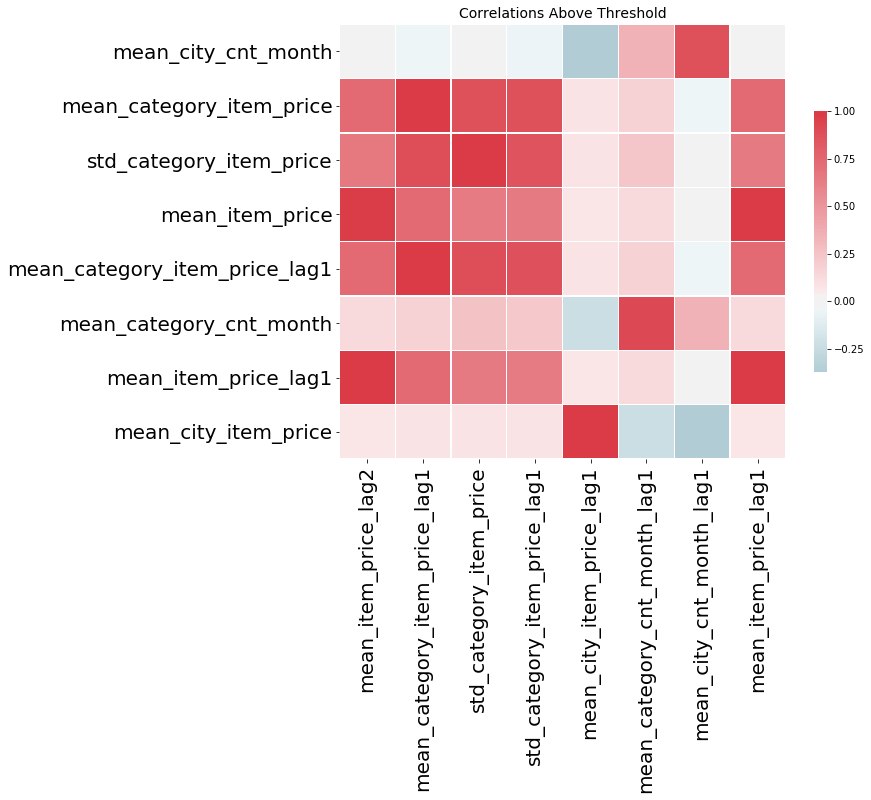

In [9]:
fs.plot_collinear()

In [10]:
fs.record_collinear

,drop_feature,corr_feature,corr_value
0,mean_item_price_lag1,mean_item_price,0.991215
1,mean_item_price_lag2,mean_item_price,0.988434
2,mean_item_price_lag2,mean_item_price_lag1,0.991497
3,std_category_item_price,mean_category_item_price,0.872823
4,mean_category_cnt_month_lag1,mean_category_cnt_month,0.915637
5,mean_category_item_price_lag1,mean_category_item_price,0.999157
6,mean_category_item_price_lag1,std_category_item_price,0.883477
7,std_category_item_price_lag1,mean_category_item_price,0.875381
8,std_category_item_price_lag1,std_category_item_price,0.860606
9,std_category_item_price_lag1,mean_category_item_price_lag1,0.867744


##### Zero Importance Features

In [ ]:
fs.identify_zero_importance(task = 'regression', 
                            eval_metric = 'rmse', 
                            n_iterations = 20, 
                             early_stopping = True)
# list of zero importance features
zero_importance_features = fs.ops['zero_importance']